<Figure size 1400x700 with 0 Axes>

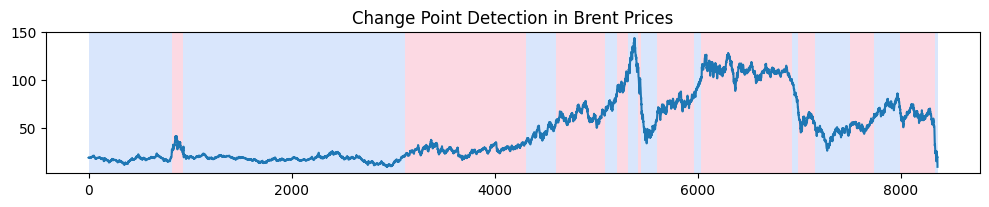

Detected change points at:
- 1990-08-06
- 1991-01-16
- 1999-09-07
- 2004-05-04
- 2005-06-16
- 2007-05-18
- 2007-10-24
- 2008-04-11
- 2008-09-03
- 2008-10-15
- 2009-05-29
- 2010-11-01
- 2011-02-10
- 2014-09-08
- 2014-12-02
- 2015-08-04
- 2016-11-30
- 2017-11-07
- 2018-11-15
- 2020-03-09


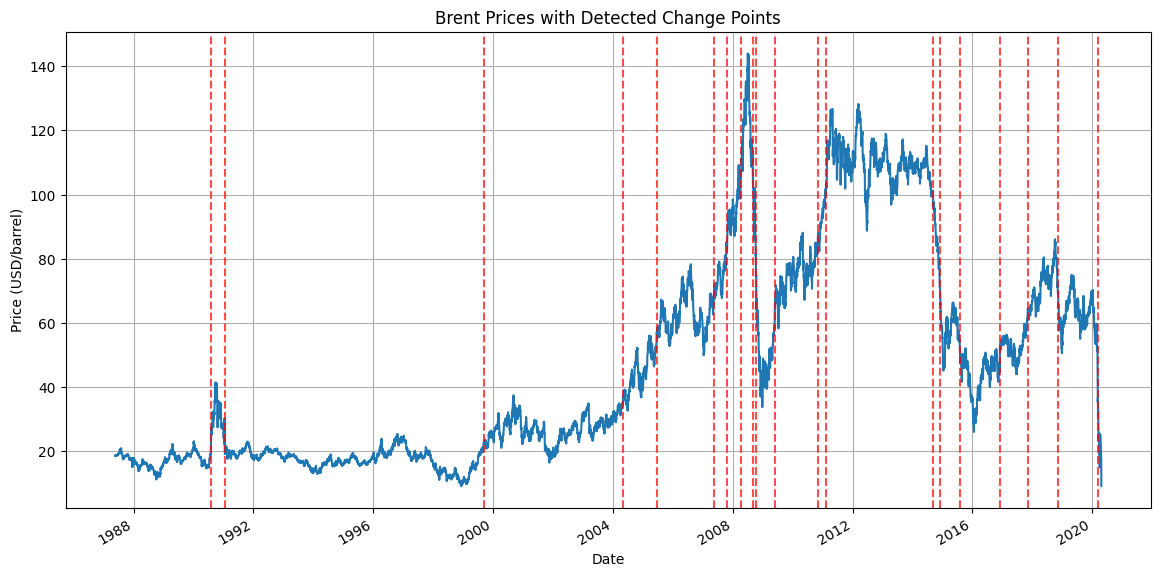

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt
import numpy as np
import os
# Load processed data
price_data = pd.read_csv('../data/processed/brent_clean.csv', parse_dates=['Date'], index_col='Date')

# Change point detection
def detect_changepoints(data, pen=10, model="rbf"):
    # Convert to numpy array
    signal = data.values.reshape(-1, 1)
    
    # Detect change points
    algo = rpt.Pelt(model=model).fit(signal)
    change_indices = algo.predict(pen=pen)
    
    # Convert indices to dates
    change_dates = data.index[change_indices[:-1]]
    
    # Plot results
    plt.figure(figsize=(14, 7))
    rpt.display(signal, change_indices)
    plt.title('Change Point Detection in Brent Prices')
    plt.savefig('../reports/figures/change_points.png')
    plt.show()
    
    return change_dates

# Run detection
change_points = detect_changepoints(price_data['Price'], pen=15)

# Print and save results
print("Detected change points at:")
for date in change_points:
    print(f"- {date.strftime('%Y-%m-%d')}")

pd.DataFrame({'change_date': change_points}).to_csv('../reports/change_points.csv', index=False)

# Visualize with price data
plt.figure(figsize=(14, 7))
price_data['Price'].plot()
for cp in change_points:
    plt.axvline(x=cp, color='red', linestyle='--', alpha=0.7)
plt.title('Brent Prices with Detected Change Points')
plt.ylabel('Price (USD/barrel)')
plt.grid(True)
plt.savefig('../reports/figures/price_with_change_points.png')
plt.show()